# Conexão com postgres e Relatorios do Sistema

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [ ]:
#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas

### Importando bibliotecas

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import calendar

### Usando psycopg2 para configurar conexão

In [10]:
conn = psycopg2.connect(dbname='defaultdb',
                        user='avnadmin',
                        password='AVNS_R_8PgcoiAljts5A2h1U',
                        host='trabalhobd2-jhonpinhosantos-75df.e.aivencloud.com',
                        port='23090',
                        sslmode='require')

# Relatórios

## Relatório 1
### Objetivo: obter uma visão geral da relação entre a quantidade de pedidos pendentes e entregues.

In [11]:
res = pd.read_sql_query("SELECT CASE WHEN data_recebimento IS NULL THEN 'Pendente' ELSE 'Entregue' END AS status_pedido, COUNT(*) AS quantidade_pedidos FROM PEDIDO GROUP BY CASE WHEN data_recebimento IS NULL THEN 'Pendente' ELSE 'Entregue' END ORDER BY quantidade_pedidos DESC;", conn)
res

<ipython-input-11-ab8350badf20>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query("SELECT CASE WHEN data_recebimento IS NULL THEN 'Pendente' ELSE 'Entregue' END AS status_pedido, COUNT(*) AS quantidade_pedidos FROM PEDIDO GROUP BY CASE WHEN data_recebimento IS NULL THEN 'Pendente' ELSE 'Entregue' END ORDER BY quantidade_pedidos DESC;", conn)


,status_pedido,quantidade_pedidos
0,Entregue,30
1,Pendente,17


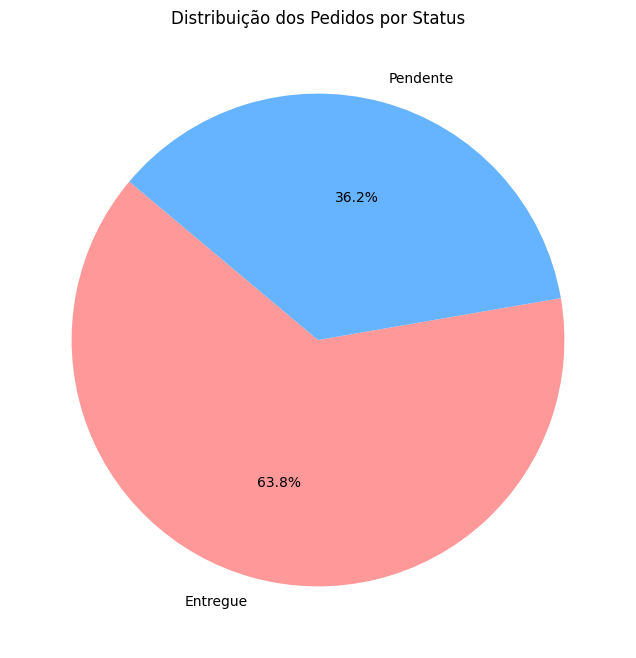

In [12]:
plt.figure(figsize=(8, 8))
plt.pie(res['quantidade_pedidos'], labels=res['status_pedido'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Distribuição dos Pedidos por Status')
plt.show()

# ==========================================================================================
## Relatório 2
### Objetivo: calcular a quantidade total de pedidos de cada item.
Código para obtenção do resultado:

In [43]:
res = pd.read_sql_query("SELECT CATALOGO.descricao AS item, SUM(ITENS_PEDIDO.quantidade) AS quantidade_total FROM ITENS_PEDIDO JOIN CATALOGO ON ITENS_PEDIDO.FK_ITENS_id_item = CATALOGO.id_item GROUP BY CATALOGO.descricao ORDER BY quantidade_total DESC;",conn)
res

<ipython-input-43-8484cab15019>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query("SELECT CATALOGO.descricao AS item, SUM(ITENS_PEDIDO.quantidade) AS quantidade_total FROM ITENS_PEDIDO JOIN CATALOGO ON ITENS_PEDIDO.FK_ITENS_id_item = CATALOGO.id_item GROUP BY CATALOGO.descricao ORDER BY quantidade_total DESC;",conn)


,item,quantidade_total
0,Calibragem de Pneus,10
1,Troca de Amortecedores,10
2,Pneu,10
3,Inspeção Completa,9
4,Lâmpada de Farol,9
5,Troca de Pastilhas de Freio,9
6,Serviço de Inspeção Geral,8
7,Troca de Filtro de Cabine,8
8,Troca de Bateria,8
9,Parabrisa,8


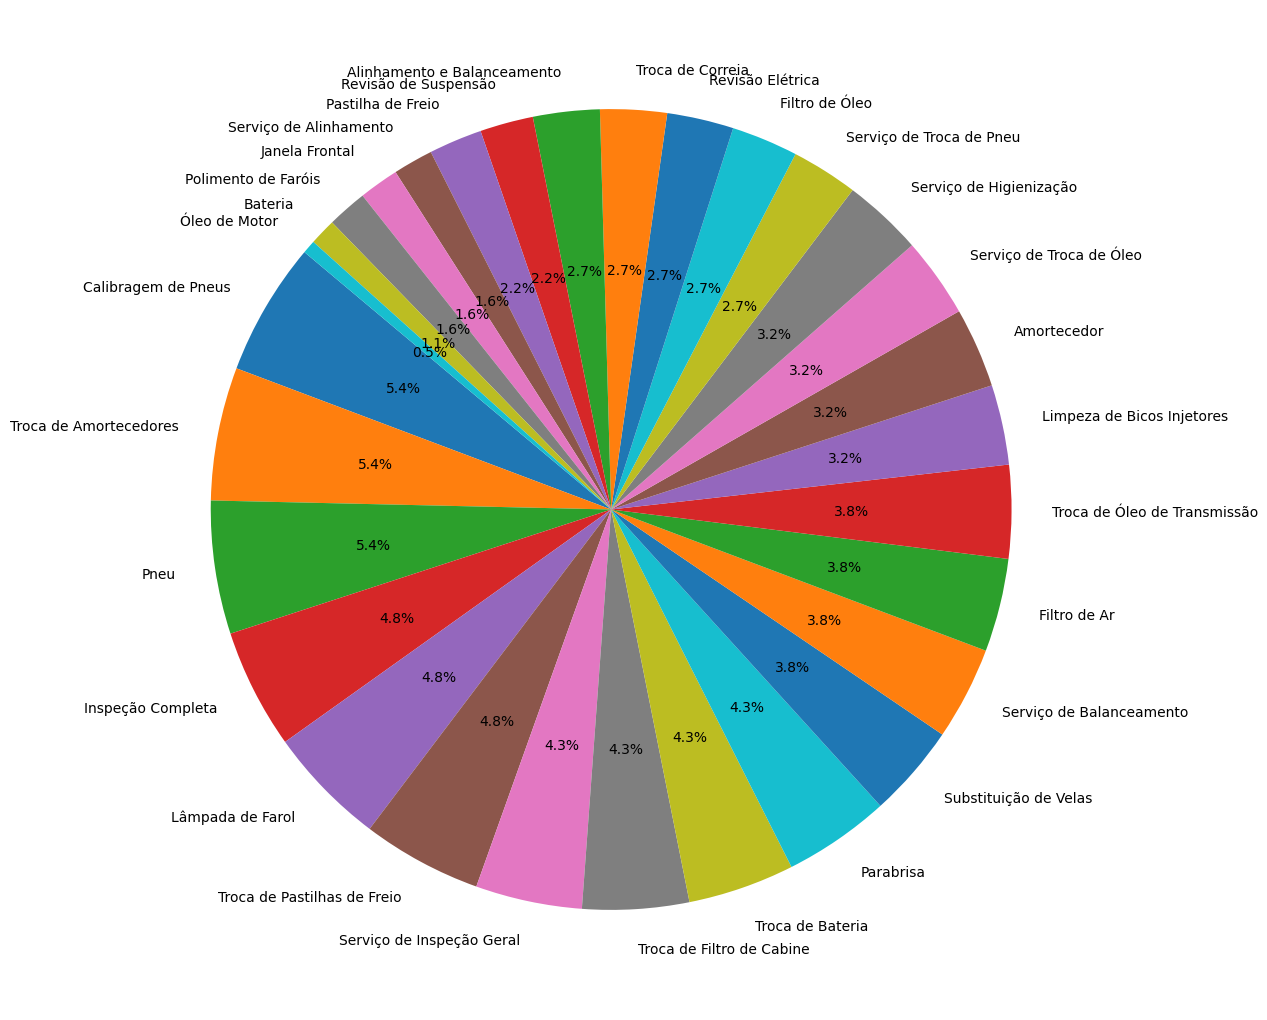

In [46]:
plt.figure(figsize=(13, 13))
plt.pie(res['quantidade_total'], labels=res['item'], autopct='%1.1f%%', startangle=140)
plt.show()

# ============================================================
## Relatório 3
### Objetivo: fornecer uma visão do custo total em manutenções de todos os equipamentos, permitindo visualizar qual equipamento está gastando mais com manutenções.
Código para obtenção do resultado:

In [40]:
res = pd.read_sql_query("SELECT ORDEM_SERVICO.id_equipamento AS equipamento, SUM(ITENS_PEDIDO.quantidade * ITENS_PEDIDO.valor) AS valor_total_gasto FROM ORDEM_SERVICO JOIN PEDIDO ON ORDEM_SERVICO.id_os = PEDIDO.FK_ORDEM_SERVICO_id_os JOIN ITENS_PEDIDO ON PEDIDO.id_pedido = ITENS_PEDIDO.FK_PEDIDO_id_pedido GROUP BY ORDEM_SERVICO.id_equipamento ORDER BY valor_total_gasto DESC;",conn)
res

<ipython-input-40-ca6358d6364a>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query("SELECT ORDEM_SERVICO.id_equipamento AS equipamento, SUM(ITENS_PEDIDO.quantidade * ITENS_PEDIDO.valor) AS valor_total_gasto FROM ORDEM_SERVICO JOIN PEDIDO ON ORDEM_SERVICO.id_os = PEDIDO.FK_ORDEM_SERVICO_id_os JOIN ITENS_PEDIDO ON PEDIDO.id_pedido = ITENS_PEDIDO.FK_PEDIDO_id_pedido GROUP BY ORDEM_SERVICO.id_equipamento ORDER BY valor_total_gasto DESC;",conn)


,equipamento,valor_total_gasto
0,1016,10000.0
1,1008,8100.0
2,1005,6400.0
3,1015,6400.0
4,1001,5000.0
5,1029,5000.0
6,1013,4900.0
7,1003,4900.0
8,1022,4050.0
9,1028,4050.0


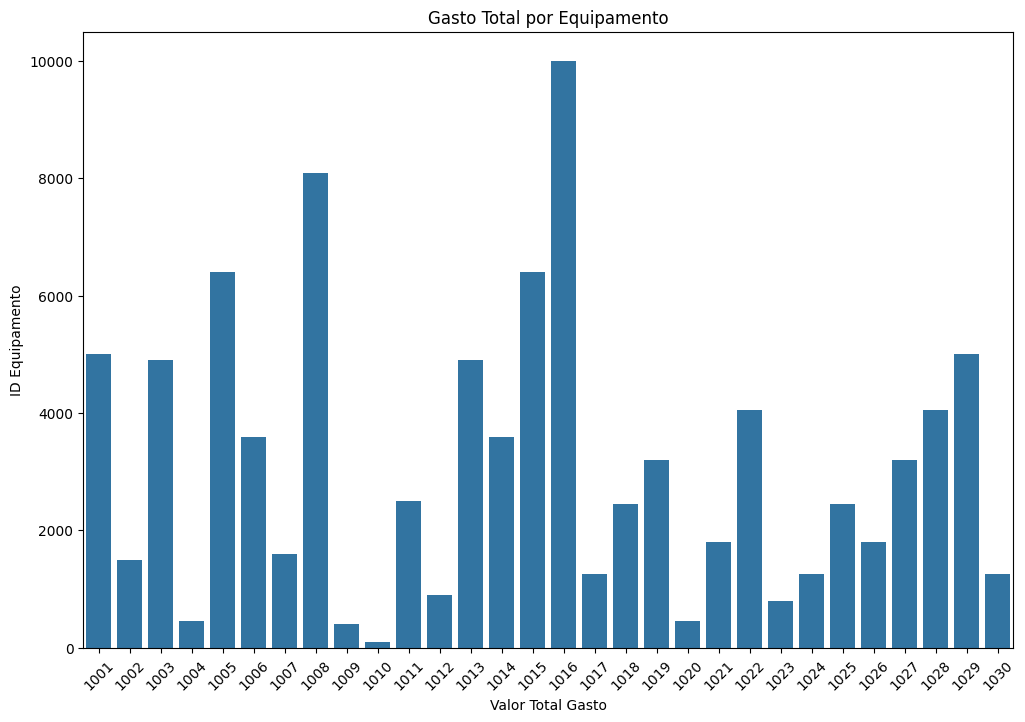

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x='equipamento', y='valor_total_gasto', data=res)
plt.title('Gasto Total por Equipamento')
plt.xlabel('Valor Total Gasto')
plt.ylabel('ID Equipamento')
plt.xticks(rotation=45)
plt.show()